In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 18, in swig_import_helper
    return importlib.import_module(mname)
  File "C:\Anaconda3\lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 986, in _gcd_import
  File "<frozen importlib._bootstrap>", line 969, in _find_and_load
  File "<frozen importlib._bootstrap>", line 958, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 666, in _load_unlocked
  File "<frozen importlib._bootstrap>", line 577, in module_from_spec
  File "<frozen importlib._bootstrap_external>", line 906, in create_module
  File "<frozen importlib._bootstrap>", line 222, in _call_with_frames_removed
ImportError: DLL load failed: The specified module could not be found.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 41, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 21, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 20, in swig_import_helper
    return importlib.import_module('_pywrap_tensorflow_internal')
  File "C:\Anaconda3\lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
ImportError: No module named '_pywrap_tensorflow_internal'


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [2]:
# Constant seed for replicating training results
np.random.seed(2017)

In [3]:
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 267
nb_validation_samples = 84
epochs = 50
batch_size = 16
img_width= 28
img_height = 28

In [4]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

Found 267 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


In [5]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [6]:
model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

model.save_weights('first_try.h5')

Epoch 1/50
16/16 [==============================] - 4s - loss: 0.6953 - acc: 0.5273 - val_loss: 0.6776 - val_acc: 0.5250
Epoch 2/50
16/16 [==============================] - 2s - loss: 0.6607 - acc: 0.6073 - val_loss: 0.6027 - val_acc: 0.7750
Epoch 3/50
16/16 [==============================] - 2s - loss: 0.6132 - acc: 0.6570 - val_loss: 0.5524 - val_acc: 0.7750
Epoch 4/50
16/16 [==============================] - 2s - loss: 0.6033 - acc: 0.7039 - val_loss: 0.5423 - val_acc: 0.7000
Epoch 5/50
16/16 [==============================] - 2s - loss: 0.5210 - acc: 0.7335 - val_loss: 0.4648 - val_acc: 0.8625
Epoch 6/50
16/16 [==============================] - 2s - loss: 0.5158 - acc: 0.7391 - val_loss: 0.6442 - val_acc: 0.6000
Epoch 7/50
16/16 [==============================] - 2s - loss: 0.5040 - acc: 0.7816 - val_loss: 0.5722 - val_acc: 0.6625
Epoch 8/50
16/16 [==============================] - 2s - loss: 0.4548 - acc: 0.7894 - val_loss: 0.4099 - val_acc: 0.8500
Epoch 9/50
16/16 [==============

In [7]:
# 0 = meme
# 1 = non meme

### Let us check with normal image

In [22]:
from PIL import Image
img = Image.open('./data/test/16-01910.500.jpg').convert('RGB')

In [18]:
img2 = Image.open('/home/rishikesh/Desktop/banner.png').convert('RGB')

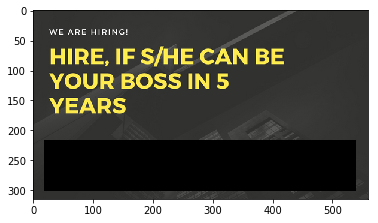

In [19]:
imshow(img2)

In [20]:
input_img=np.asarray(img2.resize((28,28)))

In [21]:
input_img

array([[[51, 51, 49],
        [51, 51, 49],
        [50, 50, 48],
        ..., 
        [49, 49, 47],
        [49, 49, 47],
        [49, 49, 47]],

       [[51, 51, 49],
        [50, 50, 48],
        [50, 50, 48],
        ..., 
        [49, 49, 47],
        [49, 49, 47],
        [49, 49, 47]],

       [[52, 52, 50],
        [51, 51, 49],
        [50, 50, 48],
        ..., 
        [49, 49, 47],
        [49, 49, 47],
        [49, 49, 47]],

       ..., 
       [[50, 50, 48],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ..., 
        [ 0,  0,  0],
        [ 0,  0,  0],
        [50, 50, 48]],

       [[48, 48, 46],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ..., 
        [ 0,  0,  0],
        [ 0,  0,  0],
        [49, 49, 47]],

       [[49, 49, 47],
        [49, 49, 47],
        [49, 49, 47],
        ..., 
        [57, 57, 55],
        [50, 50, 48],
        [58, 58, 56]]], dtype=uint8)

In [10]:
input_img=np.asarray(img2.resize((28,28)))
input_img = input_img.astype('float32')
input_img /= 255
if K.image_data_format() == 'channels_first':
    input_img=input_img.reshape((1,3,28, 28))
else:
    input_img=input_img.reshape((1, 28, 28, 3))
dict_={0:'meme',1:'not meme'}

In [11]:
model.predict(input_img)

array([[ 0.01240762]], dtype=float32)

In [54]:
from pathlib import Path

if Path("model_weigts.h5").is_file():
    print("yes")

In [43]:
y=z[0].clip(min=0, max=1)

In [49]:
import math

In [52]:
math.ceil(z[0][0])

1

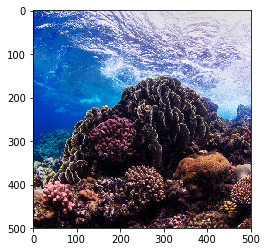

In [15]:
imshow(img)

In [16]:
new_img = img.resize((28,28))

In [17]:
test=np.asarray(new_img)

In [18]:
y_w=np.asarray(new_img).reshape((1, 28, 28, 3))

In [19]:
y_w.shape

(1, 28, 28, 3)

In [20]:
model.predict(y_w)

array([[ 0.]], dtype=float32)

Not a meme

### Image with Text but not MEME

In [21]:
img1 = Image.open('./data/test/tuesday_quote.jpg')

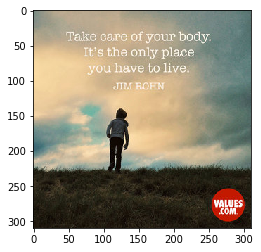

In [22]:
imshow(img1)

In [23]:
y_w2=np.asarray(np.asarray(img1.resize((28,28)))).reshape((1, 28, 28, 3))

In [24]:
model.predict(y_w2)
# 1 = not meme

array([[ 1.]], dtype=float32)

Oh good even with text which is not meme is successfully predicted

### With Actual Meme

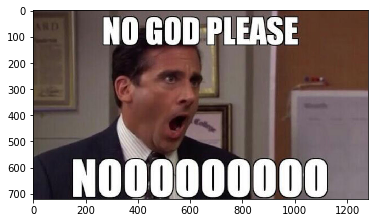

In [25]:
img2 = Image.open('./data/test/maxresdefault.jpg')
imshow(img2)

In [26]:
model.predict(np.asarray(np.asarray(img2.resize((28,28)))).reshape((1, 28, 28, 3)))

array([[ 0.]], dtype=float32)

Ok success it predicted as meme